In [95]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression,RidgeClassifier

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve,roc_auc_score

from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt

import pickle
import json

import config


### 1.Problem Statement

ABC is a firm that is experiencing a spike in employee attrition from 14% to 25% over the last year. 
The objective of this case study is to identify a strategy to address this problem in the immediate short term as well as develop a long term employee satisfaction program.

Salary hikes are not an option.



### 2.Data Gathering

In [97]:
df = pd.read_csv("Attrition Data.csv")
df

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


### EDA

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [99]:
df.isna().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

In [100]:
df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [101]:
237/(1233+237)

0.16122448979591836

In [102]:
#df["Age"]

In [103]:
df["Department"].value_counts().to_dict()

{'Research & Development': 961, 'Sales': 446, 'Human Resources': 63}

In [104]:
df["Department"].replace({'Research & Development': 2, 'Sales': 1, 'Human Resources': 0},inplace=True)

In [105]:
# df.info()

In [106]:
df["EducationField"].value_counts().to_dict()

{'Life Sciences': 606,
 'Medical': 464,
 'Marketing': 159,
 'Technical Degree': 132,
 'Other': 82,
 'Human Resources': 27}

In [107]:
df["EducationField"].replace({'Life Sciences': 5,
                                 'Medical': 4,
                                 'Marketing': 3,
                                 'Technical Degree': 2,
                                 'Other': 1,
                                 'Human Resources': 0},inplace = True)

In [108]:
# df.info()

In [109]:
df["MaritalStatus"].value_counts().to_dict()

{'Married': 673, 'Single': 470, 'Divorced': 327}

In [110]:
df["MaritalStatus"].replace({'Married': 2, 'Single': 1, 'Divorced': 0},inplace=True)

In [111]:
# df.info()

In [112]:
df["Attrition"].value_counts().to_dict()

{'No': 1233, 'Yes': 237}

In [113]:
df["Attrition"].replace({'No': 1, 'Yes': 0},inplace=True)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1470 non-null   int64
 1   Attrition                1470 non-null   int64
 2   Department               1470 non-null   int64
 3   DistanceFromHome         1470 non-null   int64
 4   Education                1470 non-null   int64
 5   EducationField           1470 non-null   int64
 6   EnvironmentSatisfaction  1470 non-null   int64
 7   JobSatisfaction          1470 non-null   int64
 8   MaritalStatus            1470 non-null   int64
 9   MonthlyIncome            1470 non-null   int64
 10  NumCompaniesWorked       1470 non-null   int64
 11  WorkLifeBalance          1470 non-null   int64
 12  YearsAtCompany           1470 non-null   int64
dtypes: int64(13)
memory usage: 149.4 KB


### sampling

#### use oversampling

In [115]:
it is use minorty class import 

SyntaxError: invalid syntax (2407271794.py, line 1)

### 1.RandomOverSampler

In [116]:
x = df.drop('Attrition',axis = 1)
y = df['Attrition']
smote_oversampler = SMOTE(sampling_strategy=0.8, random_state=23)
x_sampled, y_sampled = smote_oversampler.fit_resample(x,y)
y_sampled.value_counts()

1    1233
0     986
Name: Attrition, dtype: int64

In [117]:
x_train,x_test,y_train,y_test = train_test_split(x_sampled,y_sampled,test_size=0.3,random_state=10,stratify=y_sampled)

In [118]:
log_reg_model = LogisticRegression()
log_reg_model.fit(x_train,y_train)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [119]:
log_reg_model.score(x_train,y_train)

0.6471345782356729

In [120]:
log_reg_model.score(x_test,y_test)

0.7027027027027027

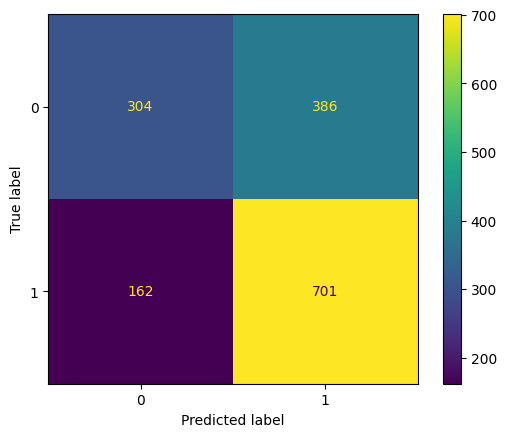

In [121]:
ConfusionMatrixDisplay.from_estimator(log_reg_model,x_train,y_train)

### Train data

In [122]:
y_pred_train = log_reg_model.predict(x_train)

Confusion_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion_matrix is \n",Confusion_matrix)

Accuracy_score  = accuracy_score(y_train,y_pred_train)
print("Accuracy_score is :",Accuracy_score)

clf_report = classification_report(y_train,y_pred_train)

print("classificatoion Report is :",clf_report)

precision_value = precision_score(y_train, y_pred_train)
print("Precision :",precision_value)

recall_value = recall_score(y_train, y_pred_train)
print('Recall :',recall_value)

f1_value = f1_score(y_train, y_pred_train)
print('F1 Score:',f1_value)
print("*"* 50)


Confusion_matrix is 
 [[304 386]
 [162 701]]
Accuracy_score is : 0.6471345782356729
classificatoion Report is :               precision    recall  f1-score   support

           0       0.65      0.44      0.53       690
           1       0.64      0.81      0.72       863

    accuracy                           0.65      1553
   macro avg       0.65      0.63      0.62      1553
weighted avg       0.65      0.65      0.63      1553

Precision : 0.6448942042318307
Recall : 0.8122827346465817
F1 Score: 0.7189743589743591
**************************************************


### test data

In [123]:
y_pred_test = log_reg_model.predict(x_test)

Confusion_matrix = confusion_matrix(y_test,y_pred_test)
print("Confusion_matrix is \n",Confusion_matrix)

Accuracy_score  = accuracy_score(y_test,y_pred_test)
print("Accuracy_score is :",Accuracy_score)

clf_report = classification_report(y_test,y_pred_test)

print(clf_report)

precision_value = precision_score(y_test,y_pred_test)
print("Precision :",precision_value)

recall_value = recall_score(y_test,y_pred_test)
print('Recall :',recall_value)

f1_value = f1_score(y_test,y_pred_test)
print('F1 Score:',f1_value)
print("*"* 50)


Confusion_matrix is 
 [[146 150]
 [ 48 322]]
Accuracy_score is : 0.7027027027027027
              precision    recall  f1-score   support

           0       0.75      0.49      0.60       296
           1       0.68      0.87      0.76       370

    accuracy                           0.70       666
   macro avg       0.72      0.68      0.68       666
weighted avg       0.71      0.70      0.69       666

Precision : 0.6822033898305084
Recall : 0.8702702702702703
F1 Score: 0.7648456057007126
**************************************************


### AUC or ROC Cureve

In [124]:
y_pred_train = log_reg_model.predict(x_train)
y_pred_train_prob = log_reg_model.predict_proba(x_train)
y_pred_train_prob.shape
y_pred_train_prob_class1 = y_pred_train_prob[:,1]

In [125]:
fpr,tpr,threshold = roc_curve(y_train,y_pred_train_prob_class1)

In [126]:
# plt.plot(fpr,tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title("ROC Curve")
# plt.savefig('ROC_Curve.png')

### Ridge Regression

In [127]:
ridge_model = RidgeClassifier(alpha = 0.1)
ridge_model.fit(x_train, y_train)
ridge_model.coef_

array([[ 1.31969161e-02,  3.47764853e-01, -4.87667160e-03,
         1.01855682e-01,  8.40855451e-02,  1.93414324e-01,
         1.53378814e-01,  1.00310162e-01,  2.05492665e-05,
        -2.33944745e-02,  2.42129301e-01,  9.27333957e-03]])

In [128]:
# Evaluation on Training Dataset

y_pred = ridge_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred)
print("Confusion Matrix :\n", cnf_matrix)
print("*"* 50)

accuracy = accuracy_score(y_train, y_pred)
print("Accuracy is :",accuracy)
print("*"* 50)

clf_report = classification_report(y_train, y_pred)
print('Classification Report :\n',clf_report)
print("*"* 50)

precision_value = precision_score(y_train, y_pred)
print("Precision :",precision_value)

recall_value = recall_score(y_train,y_pred)
print("Recall_value is ",recall_value)

f1_value = f1_score(y_train, y_pred)
print('F1 Score:',f1_value)

Confusion Matrix :
 [[487 203]
 [160 703]]
**************************************************
Accuracy is : 0.7662588538312942
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.75      0.71      0.73       690
           1       0.78      0.81      0.79       863

    accuracy                           0.77      1553
   macro avg       0.76      0.76      0.76      1553
weighted avg       0.77      0.77      0.77      1553

**************************************************
Precision : 0.7759381898454746
Recall_value is  0.8146002317497103
F1 Score: 0.79479932165065


In [129]:
# Evaluation on Testing Dataset

y_pred = ridge_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n", cnf_matrix)
print("*"* 50)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is :",accuracy)
print("*"* 50)

clf_report = classification_report(y_test, y_pred)
print('Classification Report :\n',clf_report)
print("*"* 50)

precision_value = precision_score(y_test,y_pred)
print("Precision :",precision_value)

recall_value = recall_score(y_test,y_pred)
print('Recall :',recall_value)

f1_value = f1_score(y_test, y_pred)
print('F1 Score:',f1_value)
print("*"* 50)


Confusion Matrix :
 [[216  80]
 [ 83 287]]
**************************************************
Accuracy is : 0.7552552552552553
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.72      0.73      0.73       296
           1       0.78      0.78      0.78       370

    accuracy                           0.76       666
   macro avg       0.75      0.75      0.75       666
weighted avg       0.76      0.76      0.76       666

**************************************************
Precision : 0.782016348773842
Recall : 0.7756756756756756
F1 Score: 0.7788331071913162
**************************************************


### Save the Data

In [130]:
with open(r"artifacts/ridge_model.pkl","wb") as f:
    pickle.dump(ridge_model,f)

In [131]:
x_sampled.columns

Index(['Age', 'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'WorkLifeBalance',
       'YearsAtCompany'],
      dtype='object')

### Save Data Columns

In [132]:
columns_names = x_sampled.columns
Project_data = {"Columns Name": columns_names.tolist(),
                "Department":{'Research & Development': 2, 'Sales':1, 'Human Resources': 0},
                "EducationField":{'Life Sciences':5,'Medical':4,'Marketing':3,'Technical Degree':2,'Other': 1,'Human Resources': 0},
                "MaritalStatus":{'Married': 2, 'Single': 1, 'Divorced': 0}}
with open(r"artifacts/project_data2.json","w") as f:
    json.dump(Project_data,f)

In [133]:
ridge_model.n_features_in_

12

### Lasso Regression

In [94]:
# Lasso_model = Lasso(alpha = 0.1)
# Lasso_model.fit(x_train, y_train)
# Lasso_model.coef_

In [47]:
# # Evaluation on Training Dataset

# y_pred = Lasso_model.predict(x_train)

# cnf_matrix = confusion_matrix(y_train, y_pred)
# print("Confusion Matrix :\n", cnf_matrix)
# print("*"* 50)

# accuracy = accuracy_score(y_train, y_pred)
# print("Accuracy is :",accuracy)
# print("*"* 50)

# clf_report = classification_report(y_train, y_pred)
# print('Classification Report :\n',clf_report)
# print("*"* 50)

# precision_value = precision_score(y_train, y_pred)
# print("Precision :",precision_value)

# recall_value = recall_score(y_train,y_pred)
# print("Recall_value is ",recall_value)

# f1_value = f1_score(y_train, y_pred)
# print('F1 Score:',f1_value)

### KNN Model

In [48]:
knn_clf = KNeighborsClassifier(n_neighbors=5,p=2)
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

In [49]:
# Traning Data Evaluation

y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix :\n',cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy :',accuracy)

clf_report = classification_report(y_train,y_pred_train)
print('Classification Report :\n',clf_report)

Confusion Matrix :
 [[576 114]
 [188 675]]
Accuracy : 0.8055376690276883
Classification Report :
               precision    recall  f1-score   support

           0       0.75      0.83      0.79       690
           1       0.86      0.78      0.82       863

    accuracy                           0.81      1553
   macro avg       0.80      0.81      0.80      1553
weighted avg       0.81      0.81      0.81      1553



In [50]:
# Testing Data Evaluation

y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print('Confusion Matix :',cnf_matrix)

accuracy = accuracy_score(y_test,y_pred)
print('Accuracy :',accuracy)

clf_report = classification_report(y_test,y_pred)
print('Classification Report :\n',clf_report)

Confusion Matix : [[210  86]
 [116 254]]
Accuracy : 0.6966966966966966
Classification Report :
               precision    recall  f1-score   support

           0       0.64      0.71      0.68       296
           1       0.75      0.69      0.72       370

    accuracy                           0.70       666
   macro avg       0.70      0.70      0.70       666
weighted avg       0.70      0.70      0.70       666



In [51]:
train_accuracy_list = []
test_accuracy_list = list()
k_values = np.arange(3,20)
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k, p=2)
    knn_clf.fit(x_train, y_train)
    
    train_accuracy = np.around(knn_clf.score(x_train, y_train),3)
    train_accuracy_list.append(train_accuracy)
    
    test_accuracy = np.around(knn_clf.score(x_test, y_test),3)
    test_accuracy_list.append(test_accuracy)


In [53]:
# plt.plot(k_values, train_accuracy_list)
# plt.plot(k_values, test_accuracy_list)
# plt.xlabel("K Values")
# plt.ylabel('Accuracies')
# plt.title("Train and Test Accuracies with Euclidean Distance")
# plt.savefig("Accuracy_ED.png")

### KNN Scalling

In [41]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [3]:
# normal_scaler = StandardScaler()
# array = normal_scaler.fit_transform(x_samped)
# dfx = pd.DataFrame(array,columns= x_smpled.columns)
# dfx

In [4]:
# x_train,x_test,y_train,y_test = train_test_split(dfx,y_samped,test_size=0.2,random_state=30)
# KNN_reg = KNeighborsRegressor(n_neighbors=3,p=1)
# KNN_reg.fit(x_train,y_train)

In [5]:
#  y_pred_train = knn_clf.predict(x_train)

# cnf_matrix = confusion_matrix(y_train, y_pred_train)
# print("Confusion Matrix :\n", cnf_matrix)

# accuracy = accuracy_score(y_train, y_pred_train)
# print("Accuracy :", accuracy)

# clf_report = classification_report(y_train, y_pred_train)
# print("Classification Report :\n", clf_report)

In [54]:
pip list

Package              Version
-------------------- -----------
anyio                3.6.1
argon2-cffi          21.3.0
argon2-cffi-bindings 21.2.0
asttokens            2.0.8
attrs                22.1.0
Babel                2.10.3
backcall             0.2.0
beautifulsoup4       4.11.1
bleach               5.0.1
certifi              2022.6.15
cffi                 1.15.1
charset-normalizer   2.1.1
click                8.1.3
colorama             0.4.5
contourpy            1.0.6
cycler               0.11.0
debugpy              1.6.3
decorator            5.1.1
defusedxml           0.7.1
dnspython            2.3.0
entrypoints          0.4
et-xmlfile           1.1.0
executing            0.10.0
fastjsonschema       2.16.1
Flask                2.2.2
fonttools            4.38.0
idna                 3.3
imbalanced-learn     0.10.1
imblearn             0.0
ipykernel            6.15.1
ipython              8.4.0
ipython-genutils     0.2.0
ipywidgets           8.0.1
itsdangerous         2.1.2
jedi      


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
Flask                2.2.2
numpy                1.23.4
pandas               1.5.1
scikit-learn         1.2.0
seaborn              0.12.1
